In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
pd.options.display.max_columns = None
# Standard plotly imports
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#py.initnotebookmode(connected=True) # this code, allow us to work with offline plotly version
# Using plotly + cufflinks in offline mode
import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Modules for Balancing the Train Dataset
from imblearn.combine import SMOTETomek


# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics


# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [3]:
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.metrics import confusion_matrix, average_precision_score, classification_report
from sklearn.model_selection import cross_val_predict, train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
import xgboost as xgb
from collections import Counter

from sklearn.preprocessing import RobustScaler, MinMaxScaler
from scipy.stats import boxcox 

from sklearn.decomposition import PCA

In [4]:
data = pd.read_csv('employee_attrition.csv')

In [5]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [7]:
data.shape

(1470, 35)

In [8]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

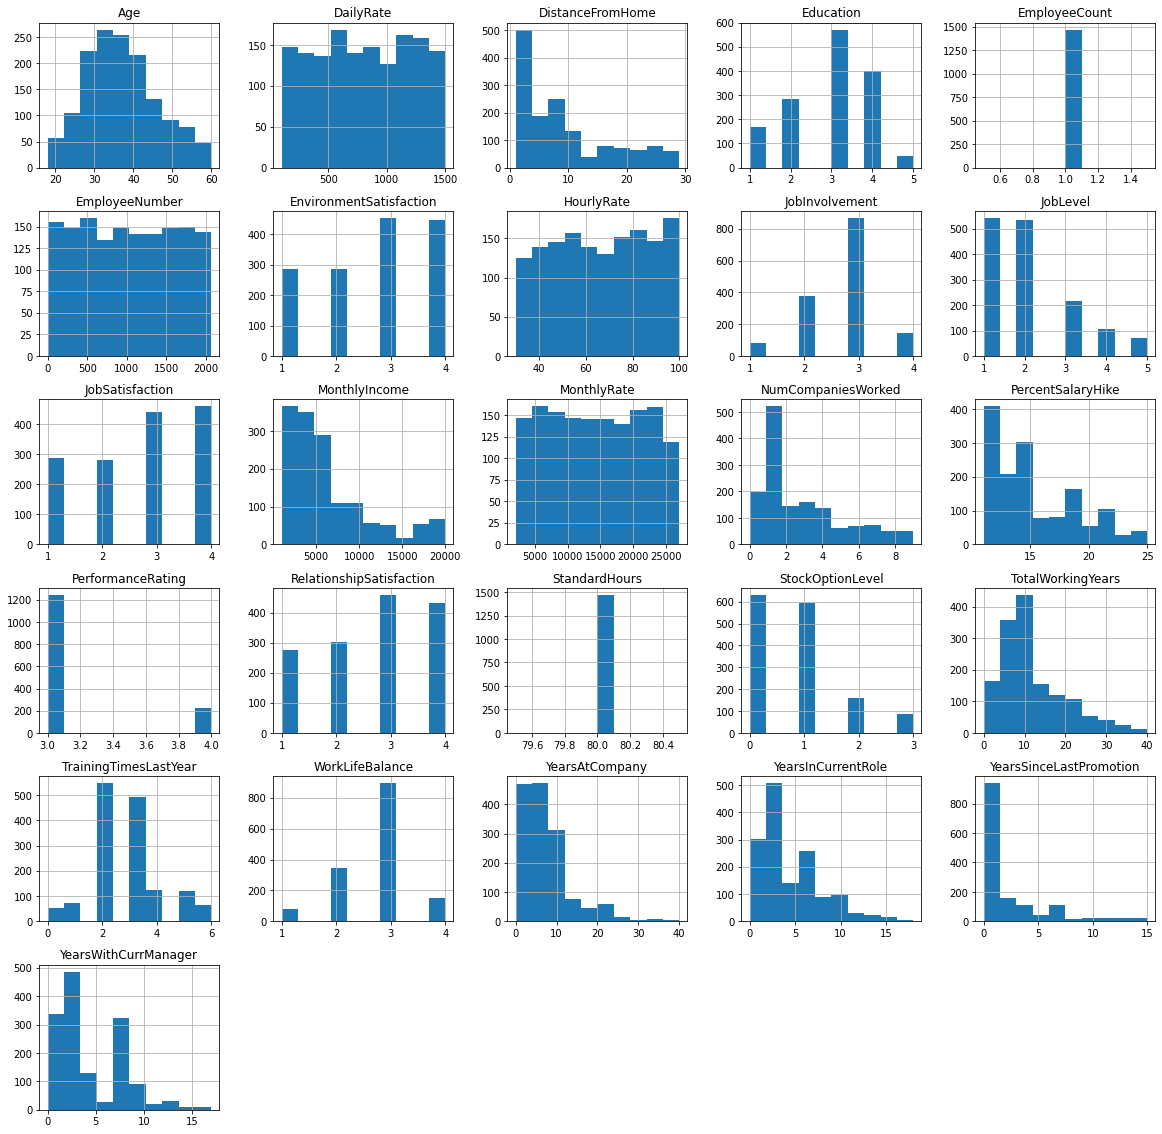

In [14]:
data.hist(figsize=(20,20))
plt.show()

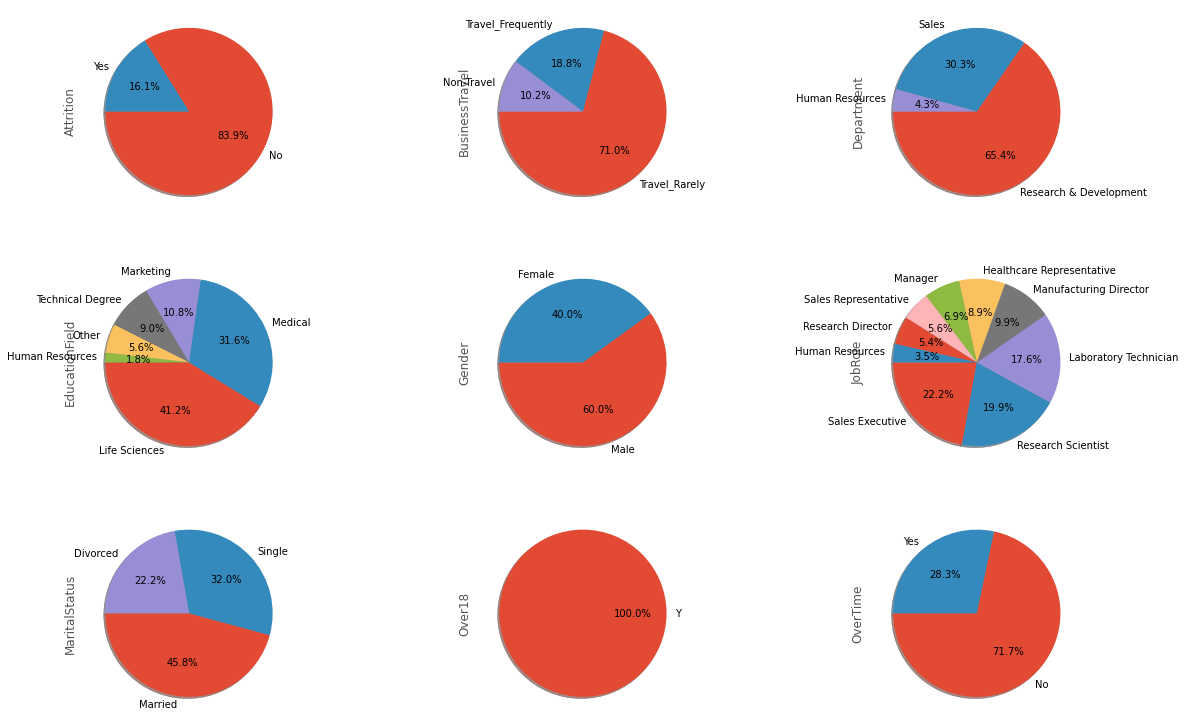

In [15]:
fig=plt.figure(figsize=(20,50))
plt.style.use('ggplot')
for i in range(len((data.select_dtypes(include='object')).columns)):
    fig.add_subplot(11,3,i+1)
    data.select_dtypes(include='object').iloc[:,i].value_counts().plot(kind="pie", subplots=True, autopct='%1.1f%%',
        shadow=True, startangle=180)

In [16]:
data_new = data.copy()

In [17]:
data_new.drop([ 'EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1,inplace=True)

Ex-exmployees: median age = 32 years old and standard deviation = 9.7
Current exmployees: median age = 36 years old and standard deviation = 8.9


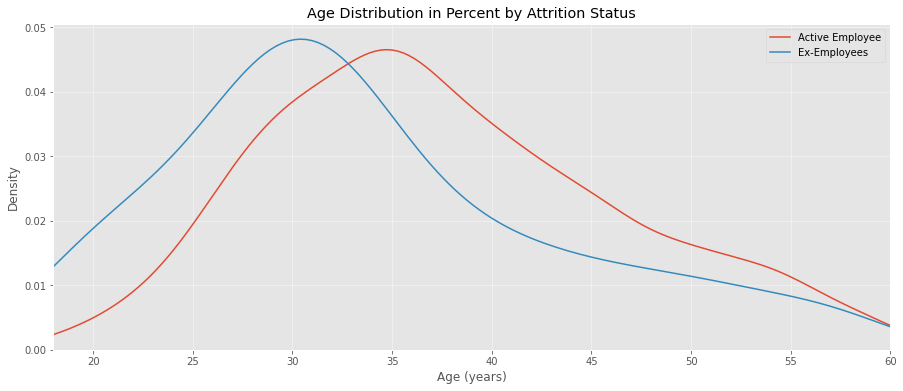

In [18]:
plt.figure(figsize=(15,6))
plt.grid(True, alpha=0.5)
sns.kdeplot(data_new.loc[data_new['Attrition'] == 'No', 'Age'], label = 'Active Employee')
sns.kdeplot(data_new.loc[data_new['Attrition'] == 'Yes', 'Age'], label = 'Ex-Employees')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.legend()
plt.title('Age Distribution in Percent by Attrition Status');
print('Ex-exmployees: median age = {:.0f} years old and standard deviation = {:.1f}'.format(data_new[data_new['Attrition']=='Yes']['Age'].median(), data_new[data_new['Attrition']=='Yes']['Age'].std()))
print('Current exmployees: median age = {:.0f} years old and standard deviation = {:.1f}'.format(data_new[data_new['Attrition']=='No']['Age'].median(), data_new[data_new['Attrition']=='No']['Age'].std()))

In [19]:
df_HR = data_new.copy()

Distance from home for employees to get to work is from 1 to 29 miles.
Average distance from home for currently active employees: 8.92 miles and ex-employees: 10.63 miles
Median distance from home for currently active employees: 7 miles and ex-employees: 9 miles
Standard Deviation distance from home for currently active employees: 8.01 miles and ex-employees: 8.45 miles


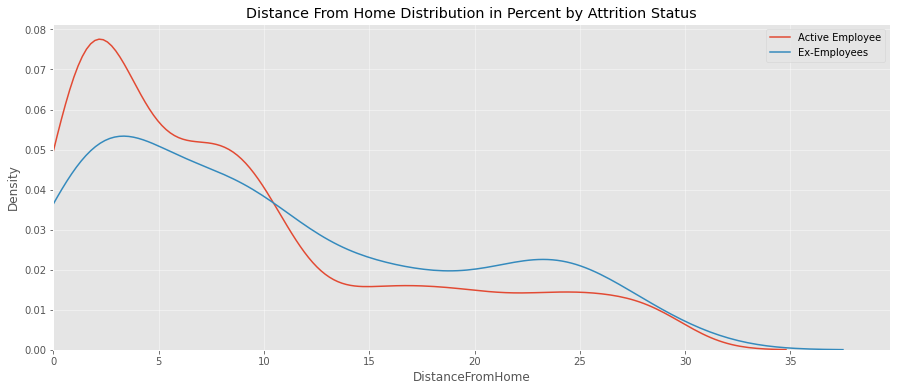

In [20]:
print("Distance from home for employees to get to work is from {} to {} miles.".format(df_HR['DistanceFromHome'].min(),
                                                                                       df_HR['DistanceFromHome'].max()))

print('Average distance from home for currently active employees: {:.2f} miles and ex-employees: {:.2f} miles'.format(
    df_HR[df_HR['Attrition'] == 'No']['DistanceFromHome'].mean(), df_HR[df_HR['Attrition'] == 'Yes']['DistanceFromHome'].mean()))

print('Median distance from home for currently active employees: {:.0f} miles and ex-employees: {:.0f} miles'.format(
    df_HR[df_HR['Attrition'] == 'No']['DistanceFromHome'].median(), df_HR[df_HR['Attrition'] == 'Yes']['DistanceFromHome'].median()))

print('Standard Deviation distance from home for currently active employees: {:.2f} miles and ex-employees: {:.2f} miles'.format(
    df_HR[df_HR['Attrition'] == 'No']['DistanceFromHome'].std(), df_HR[df_HR['Attrition'] == 'Yes']['DistanceFromHome'].std()))


plt.figure(figsize=(15,6))
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'DistanceFromHome'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'DistanceFromHome'], label = 'Ex-Employees')
plt.xlabel('DistanceFromHome')
plt.xlim(left=0)
plt.ylabel('Density')
plt.legend()
plt.title('Distance From Home Distribution in Percent by Attrition Status');

Number of Years at the company varies from 0 to 40 years.
Ex-exmployees: median number of year at the company = 3 years old and standard deviation = 9.7
Current exmployees: median number of year at the company = 6 years old and standard deviation = 8.9


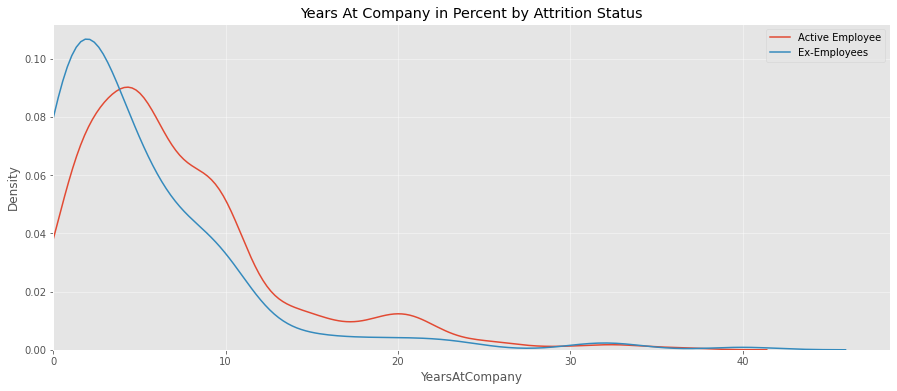

In [21]:
print("Number of Years at the company varies from {} to {} years.".format(
    df_HR['YearsAtCompany'].min(), df_HR['YearsAtCompany'].max()))

print('Ex-exmployees: median number of year at the company = {:.0f} years old and standard deviation = {:.1f}'.format(
    df_HR[df_HR['Attrition']=='Yes']['YearsAtCompany'].median(), df_HR[df_HR['Attrition']=='Yes']['Age'].std()))
print('Current exmployees: median number of year at the company = {:.0f} years old and standard deviation = {:.1f}'.format
      (df_HR[df_HR['Attrition']=='No']['YearsAtCompany'].median(), df_HR[df_HR['Attrition']=='No']['Age'].std()))

plt.figure(figsize=(15,6))
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'No', 'YearsAtCompany'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 'Yes', 'YearsAtCompany'], label = 'Ex-Employees')
plt.xlabel('YearsAtCompany')
plt.xlim(left=0)
plt.ylabel('Density')
plt.legend()
plt.title('Years At Company in Percent by Attrition Status');

In [22]:
# Attrition indicates if the employee is currently active ('No') or has left the company ('Yes')
df_HR['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [23]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    df_HR[df_HR['Attrition'] == 'No'].shape[0] / df_HR.shape[0]*100,
    df_HR[df_HR['Attrition'] == 'Yes'].shape[0] / df_HR.shape[0]*100))

Percentage of Current Employees is 83.9% and of Ex-employees is: 16.1%


In [24]:
df_HR['Attrition'].iplot(kind='hist', xTitle='Attrition',
                         yTitle='count', title='Attrition Distribution', color='darkblue')

In [25]:
# Find correlations with the target and sort
df_HR_corr = df_HR.copy()
df_HR_corr['Target'] = df_HR_corr['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
df_HR_corr = df_HR_corr.drop(['Attrition'], axis=1)
correlations = df_HR_corr.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(6))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 HourlyRate           -0.006846
PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


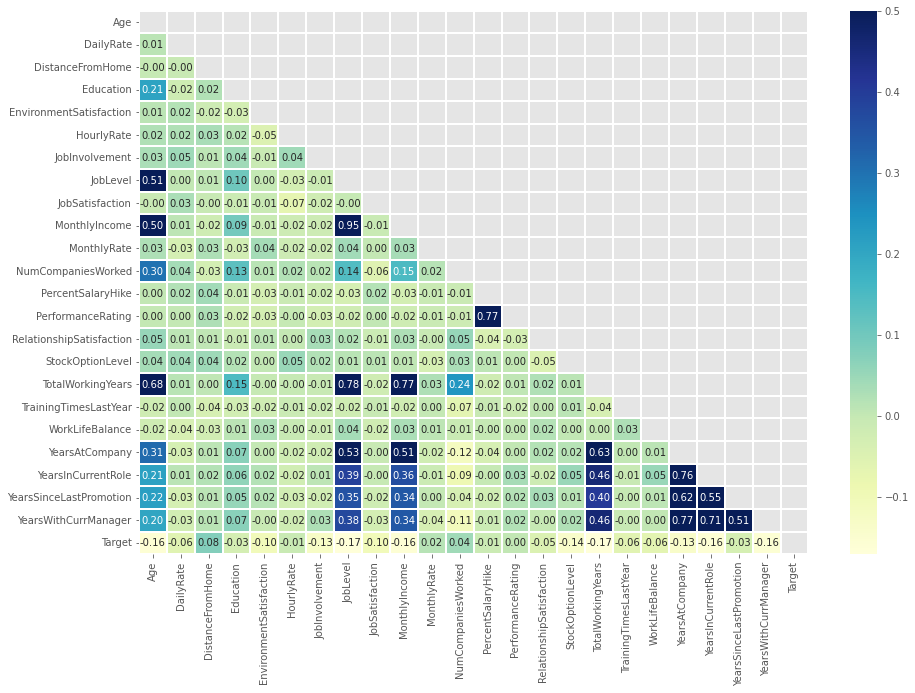

In [26]:
# Calculate correlations
corr = df_HR_corr.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            annot=True, fmt='.2f',
            linewidths=.2, cmap="YlGnBu");

In [27]:
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    out=[]
    for i in df:
        if (i > q3 or i < q1) and i>0:
            out.append(i)
    print("Outliers:",out)
    return out;
def remove_outliers(df):
    print("Registers in the initial dataset:",df.shape[0])
    for col in df.columns[1:]:
        if df[col].dtype != 'object':
            print(col)
            data_filter = Winsorization_outliers(df[col])
            df = df[~df[col].isin(data_filter)]
            print("Registers without outliers in "+col+" :"+ str(df.shape[0]))
    return df;


df_HR_Cleaned = remove_outliers(df_HR)

Registers in the initial dataset: 1470
DailyRate
Outliers: [103, 1488, 111, 1496, 111, 106, 1490, 1490, 1499, 1495, 102, 109, 1492, 111, 116, 107, 1498, 1495, 1490, 1496, 115, 104, 1495, 1490, 116, 105]
Registers without outliers in DailyRate :1444
DistanceFromHome
Outliers: []
Registers without outliers in DistanceFromHome :1444
Education
Outliers: []
Registers without outliers in Education :1444
EnvironmentSatisfaction
Outliers: []
Registers without outliers in EnvironmentSatisfaction :1444
HourlyRate
Outliers: []
Registers without outliers in HourlyRate :1444
JobInvolvement
Outliers: []
Registers without outliers in JobInvolvement :1444
JobLevel
Outliers: []
Registers without outliers in JobLevel :1444
JobSatisfaction
Outliers: []
Registers without outliers in JobSatisfaction :1444
MonthlyIncome
Outliers: [1232, 19926, 1102, 19999, 1200, 1009, 1281, 19859, 1051, 19973, 19845, 1052, 19627, 19943, 19740, 1223, 1118, 19847, 19717, 19701, 1359, 1261, 1274, 19658, 19833, 19665, 1081, 109

In [28]:
df_HR_Cleaned['Attrition'] = df_HR_Cleaned['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

In [29]:
df_HR_Cleaned.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [30]:
# Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df_HR_Cleaned.columns[1:]:
    if df_HR_Cleaned[col].dtype == 'object':
        if len(list(df_HR_Cleaned[col].unique())) <= 2:
            le.fit(df_HR_Cleaned[col])
            df_HR_Cleaned[col] = le.transform(df_HR_Cleaned[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

# convert rest of categorical variable into dummy
df_HR_Cleaned = pd.get_dummies(df_HR_Cleaned, drop_first=True)

2 columns were label encoded.


In [31]:
print(df_HR_Cleaned.shape)
df_HR_Cleaned.head()

(1326, 45)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [32]:
# As we can see here, all of our variables were turned into numericals.
df_HR_Cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1326 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1326 non-null   int64
 1   Attrition                          1326 non-null   int64
 2   DailyRate                          1326 non-null   int64
 3   DistanceFromHome                   1326 non-null   int64
 4   Education                          1326 non-null   int64
 5   EnvironmentSatisfaction            1326 non-null   int64
 6   Gender                             1326 non-null   int32
 7   HourlyRate                         1326 non-null   int64
 8   JobInvolvement                     1326 non-null   int64
 9   JobLevel                           1326 non-null   int64
 10  JobSatisfaction                    1326 non-null   int64
 11  MonthlyIncome                      1326 non-null   int64
 12  MonthlyRate         

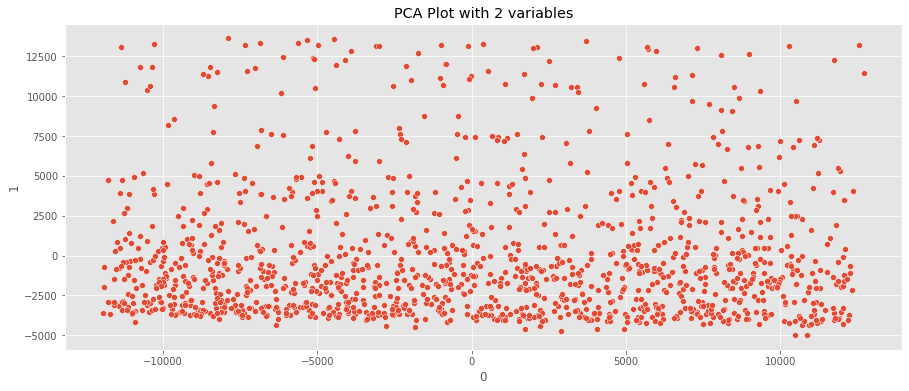

Components =  2 ;
Total explained variance =  0.99758


In [33]:
# Reducing in 2 components your data with Principal Component Analysis to filter outliers through Mahalanobis Distance.
n=2
training_data = df_HR_Cleaned.copy()
pca = PCA(n_components=n, svd_solver= 'full')
X_train_PCA = pca.fit_transform(training_data)
X_train_PCA = pd.DataFrame(X_train_PCA)
X_train_PCA.index = training_data.index
X_train_PCA.head()


plt.figure(figsize=(15,6))
sns.scatterplot(x=X_train_PCA[0],data=X_train_PCA,y=X_train_PCA[1])
plt.title('PCA Plot with {} variables'.format(pca.n_components_))
plt.show()

#PCA Explained Variance Ratio & Components
print ( "Components = ", pca.n_components_ , ";\nTotal explained variance = ",
      round(pca.explained_variance_ratio_.sum(),5)  )

In [34]:
def cov_matrix(data, verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            return covariance_matrix, inv_covariance_matrix
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")
def MahalanobisDist(inv_cov_matrix, mean_distr, data, verbose=False):
    inv_covariance_matrix = inv_cov_matrix
    vars_mean = mean_distr
    diff = data - vars_mean
    md = []
    for i in range(len(diff)):
        md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))
    return md
def MD_detectOutliers(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    outliers = []
    for i in range(len(dist)):
        if dist[i] >= threshold:
            outliers.append(i)
    return np.array(outliers)
def MD_threshold(dist, extreme=False, verbose=False):
    k = 3. if extreme else 2.
    threshold = np.mean(dist) * k
    return threshold
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False
data_train = np.array(X_train_PCA.values)
cov_matrix, inv_cov_matrix  = cov_matrix(data_train)
mean_distr = data_train.mean(axis=0)
dist_train = MahalanobisDist(inv_cov_matrix, mean_distr, data_train, verbose=False)
threshold = MD_threshold(dist_train, extreme = True)
print("Mahalanobis Distance Threshold is {:.2f}".format(threshold))

Mahalanobis Distance Threshold is 3.80


(0.0, 15.0)

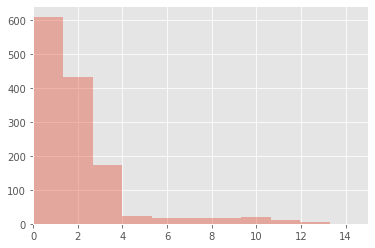

In [35]:
plt.figure()
sns.distplot(np.square(dist_train),
             bins = 10, 
             kde= False);
plt.xlim([0.0,15])

Text(0.5, 0, 'Mahalanobis dist')

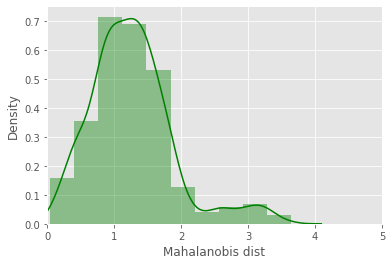

In [36]:
plt.figure()
sns.distplot(dist_train,
             bins = 10, 
             kde= True, 
            color = 'green');
plt.xlim([0.0,5])
plt.xlabel('Mahalanobis dist')

In [37]:
#Defined the threshold based on the graph and the Mahalanobis Distance Threshold indicated above.
threshold = 3.5

In [38]:
anomaly_train = pd.DataFrame()
anomaly_train['Mob dist']= dist_train
anomaly_train['Thresh'] = threshold
anomaly_train['Anomaly'] = anomaly_train['Mob dist'] > anomaly_train['Thresh']
anomaly_train.index = X_train_PCA.index

In [39]:
anomaly_train['Anomaly'].value_counts()

False    1323
True        3
Name: Anomaly, dtype: int64

In [40]:
training_data = training_data[~anomaly_train['Anomaly']]

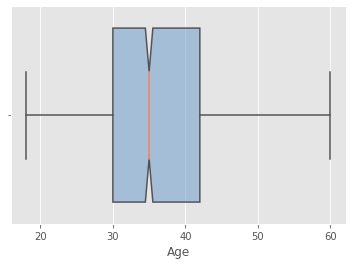

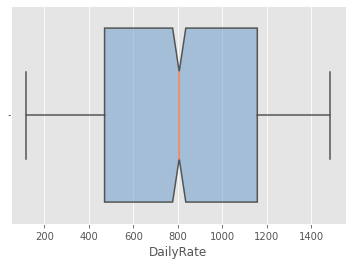

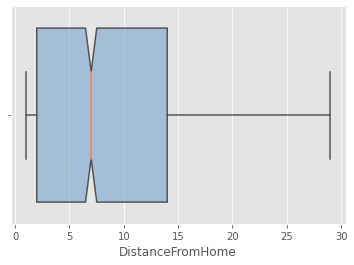

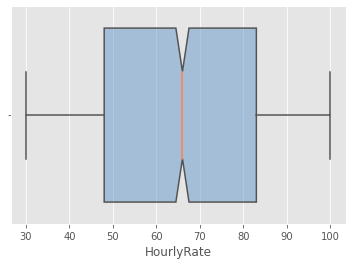

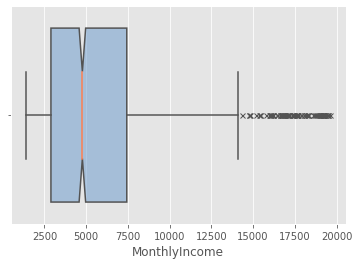

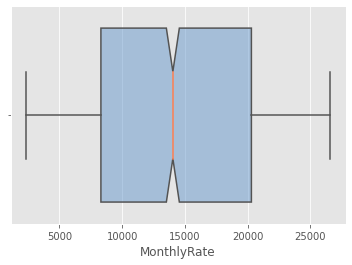

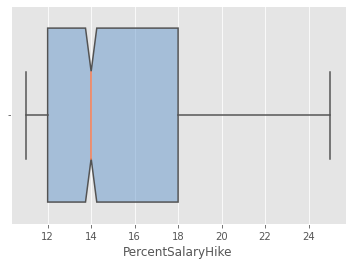

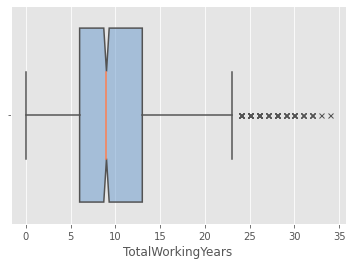

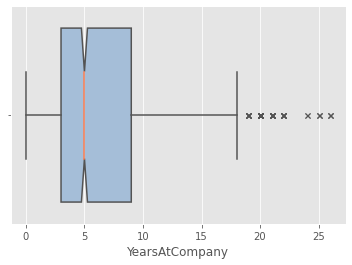

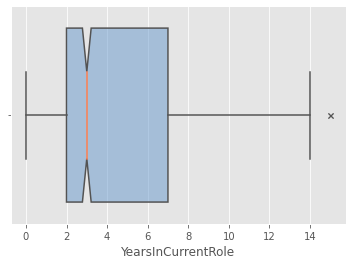

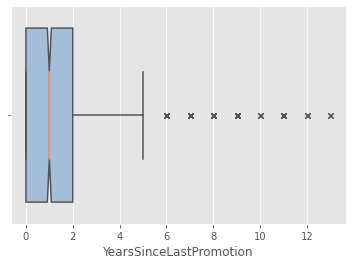

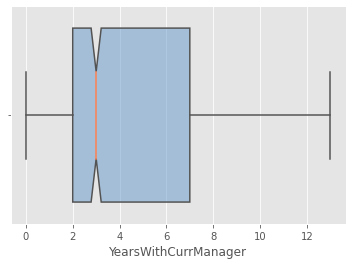

In [41]:
for col in training_data.columns:
    if (training_data[col].dtype != 'object') & (len(training_data[col].unique()) > 10):
        sns.boxplot(x=training_data[col],    flierprops={"marker": "x"},boxprops={"facecolor": (.4, .6, .8, .5)}, medianprops={"color": "coral"},notch=True)
        plt.show()

In [42]:
training_data.shape
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1323 non-null   int64
 1   Attrition                          1323 non-null   int64
 2   DailyRate                          1323 non-null   int64
 3   DistanceFromHome                   1323 non-null   int64
 4   Education                          1323 non-null   int64
 5   EnvironmentSatisfaction            1323 non-null   int64
 6   Gender                             1323 non-null   int32
 7   HourlyRate                         1323 non-null   int64
 8   JobInvolvement                     1323 non-null   int64
 9   JobLevel                           1323 non-null   int64
 10  JobSatisfaction                    1323 non-null   int64
 11  MonthlyIncome                      1323 non-null   int64
 12  MonthlyRate         

In [43]:
# Threshold for removing correlated variables
threshold = 0.85

# Absolute value correlation matrix
corr_matrix = training_data.corr().abs()
corr_matrix.head()

# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove :' % (len(to_drop)))

training_data = training_data.drop(columns = to_drop)

to_drop

There are 2 columns to remove :


['MonthlyIncome', 'Department_Sales']

In [44]:
skewed_columns=[]
for i in training_data.loc[:, training_data.ge(1).all()].columns:
    if (abs(training_data[i].skew())> 0.5)  & (len(training_data[i].unique()) >10): 
        skewed_columns.append(i)
print(skewed_columns)

['DistanceFromHome', 'PercentSalaryHike']


In [45]:
training_data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,4,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,1,61,2,2,2,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,3,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,3,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,2,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [46]:
#scaler = MinMaxScaler(feature_range = (0,1))
scaler = RobustScaler()
HR_col = list(training_data.columns)
HR_col.remove('Attrition')
for col in HR_col:
    if col in skewed_columns:
        training_data[col], best_lambda = boxcox(training_data[col]) 
    training_data[col] = training_data[col].astype(float)
    training_data[[col]] = scaler.fit_transform(training_data[[col]])
training_data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.500000,1,0.431173,-0.906794,-0.5,-0.5,-1.0,0.800000,0.0,0.0,0.5,0.453466,2.000000,1.0,-0.728765,0.0,-1.0,-1.0,-0.142857,-3.0,-2.0,0.166667,0.2,-0.5,0.4,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.166667,0,-0.767662,0.071837,-1.0,0.0,0.0,-0.142857,-1.0,0.0,-0.5,0.905931,-0.333333,0.0,0.960669,1.0,0.5,0.0,0.142857,0.0,0.0,0.833333,0.8,0.0,0.8,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.166667,1,0.825929,-0.611930,-0.5,0.5,0.0,0.742857,-1.0,-1.0,0.0,-0.970533,1.333333,1.0,0.171397,0.0,-0.5,-1.0,-0.285714,0.0,0.0,-0.833333,-0.6,-0.5,-0.6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.166667,0,0.853605,-0.425589,0.5,0.5,-1.0,-0.285714,0.0,-1.0,0.0,0.760222,-0.333333,1.0,-0.728765,0.0,0.0,-1.0,-0.142857,0.0,0.0,0.500000,0.8,1.0,-0.6,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.666667,0,-0.313183,-0.611930,-1.0,-1.0,0.0,-0.742857,0.0,-1.0,-0.5,0.216146,2.333333,0.0,-0.440367,0.0,0.5,0.0,-0.428571,0.0,0.0,-0.500000,-0.2,0.5,-0.2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [47]:
print('Size of Full dataset is: {}'.format(training_data.shape))

Size of Full dataset is: (1323, 43)


In [48]:
target_variable_name = 'Attrition'
target = training_data[target_variable_name].copy()

df_HR = training_data.drop(target_variable_name, axis=1).copy()

In [49]:
estimator_LR = LogisticRegression(C=2.1, penalty='l2',  solver='liblinear')
selector_LR = RFECV(estimator_LR, step=1, cv=5,scoring='roc_auc', n_jobs = -1)
selector_LR = selector_LR.fit(df_HR, target)
print('Optimal number of features :', selector_LR.n_features_)
print('Best features :', df_HR.columns[selector_LR.support_])

Optimal number of features : 31
Best features : Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'WorkLifeBalance',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Research Director', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Single'],
      dtype='object')


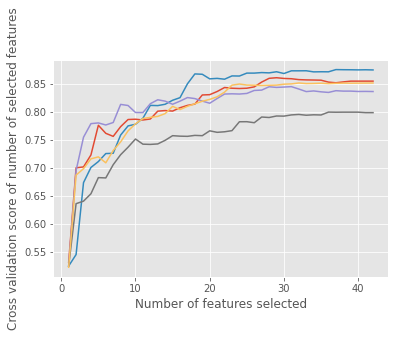

In [50]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(selector_LR.grid_scores_) + 1), selector_LR.grid_scores_)
plt.show()

In [51]:
df_HR = df_HR[df_HR.columns[selector_LR.support_]]

# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df_HR,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=target)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)
print('Resampled dataset shape %s' % Counter(y_train))

Number transactions X_train dataset:  (992, 31)
Number transactions y_train dataset:  (992,)
Number transactions X_test dataset:  (331, 31)
Number transactions y_test dataset:  (331,)
Resampled dataset shape Counter({0: 833, 1: 159})


In [52]:
smt = SMOTETomek(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print('Resampled dataset shape %s' % Counter(y_train))

Number transactions X_train dataset:  (1666, 31)
Number transactions y_train dataset:  (1666,)
Resampled dataset shape Counter({0: 833, 1: 833})


In [53]:
# Use Stratified K Folds to keep the balance in the cross validation datasets.
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [54]:
#Creating the Vot
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = xgb.XGBClassifier(eval_metric='auc', objective='binary:logistic', alpha=1)
eclf = VotingClassifier(estimators=[ ('lr', clf1), ('rf', clf2),('xgb', clf3)],voting='soft')

eclf_params = {

    'lr__C': np.linspace(1, 3, 10),
    'lr__penalty':['l1', 'l2'],
    'lr__solver' : ['liblinear'],

    
    'rf__n_estimators' : list(range(50, 101, 10)),
    'rf__max_features': ['auto', 'log2'],
    
    'xgb__subsample': [0.8, 0.9, 1.0],
    'xgb__colsample_bytree': np.linspace(0.6, 1, 5),
    'xgb__eta': np.linspace(0.001, 0.5, 2, 20),
    'xgb__n_estimators': [100, 250, 500],
    'xgb__max_depth': [4, 5, 6],
    'xgb__min_child_weight': [2, 3, 4],
}
voting_clf = RandomizedSearchCV(eclf, eclf_params, random_state=0, scoring='roc_auc', cv=skfold, n_iter=25)

In [55]:
%%time
voting_search = voting_clf.fit(X_train, y_train)

CPU times: total: 14min 28s
Wall time: 4min 7s


In [56]:
# Best AUC Score for the best voting classifier model.
voting_search.best_score_

0.9799845082938516

In [57]:
voting_search.best_params_

{'xgb__subsample': 0.9,
 'xgb__n_estimators': 100,
 'xgb__min_child_weight': 3,
 'xgb__max_depth': 6,
 'xgb__eta': 0.5,
 'xgb__colsample_bytree': 0.8,
 'rf__n_estimators': 100,
 'rf__max_features': 'log2',
 'lr__solver': 'liblinear',
 'lr__penalty': 'l1',
 'lr__C': 1.6666666666666665}

In [58]:
# Saving the best Model
best_model = voting_search.best_estimator_

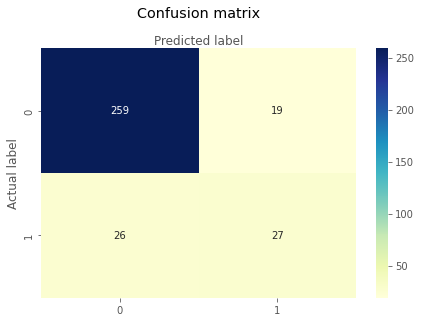

In [59]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, best_model.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [60]:
tp = cnf_matrix[1,1]
fn = cnf_matrix[1,0]
fp = cnf_matrix[0,1]
tn = cnf_matrix[0,0]
Accuracy  =  round(((tp+tn)/(tp+tn+fp+fn))*100,2)
Precision =  round((tp/(tp+fp))*100,2)
Recall    =  round((tp/(tp+fn))*100,2)
F1_score  =  round((2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))*100,2)
probs = best_model.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logit_roc_auc = round(roc_auc_score(y_test, probs),4) # calculate AUC score using test dataset

In [61]:
show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score,logit_roc_auc]],columns=['Accuracy %', 'Precision %', 'Recall %','F1_score %','AUC_Score'], index=['Valores'])
show_metrics.head()

,Accuracy %,Precision %,Recall %,F1_score %,AUC_Score
Valores,86.4,58.7,50.94,54.55,0.8429


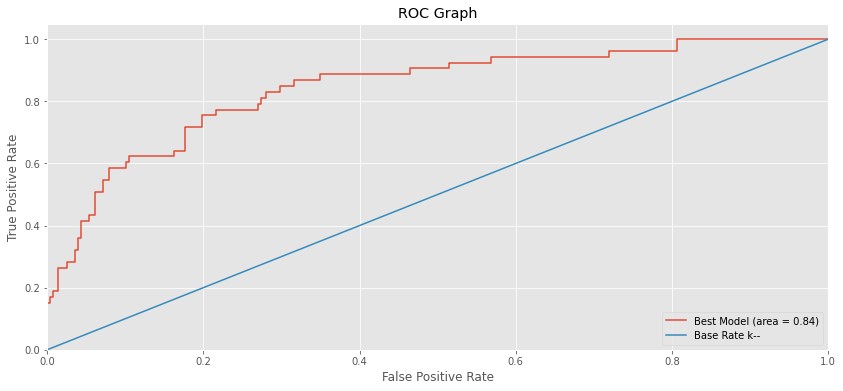

In [62]:
# Create ROC Graph
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Best Model ROC
plt.plot(fpr, tpr, label='Best Model (area = %0.2f)' % logit_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' ' k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()